# <u>Classification for Titanic Dataset </u>

<b>The Challenge</b>

<u>The sinking of the Titanic is one of the most infamous shipwrecks in history.</u>

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [1]:
test_path = 'D:/Datasets/Titanic/test.csv'
train_path = 'D:/Datasets/Titanic/train.csv'

In [2]:
import pandas as pd 

test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Data

In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <u>Part I </u> 

# <u> Filling in missing Cabins </u>

### There's too many missing cabins. I'll build a classification model to classify the cabins. First, i'll need to remove the room number from the deck letter. For the missing values (NaN), I'll make those Deck passgengers since most likely means they didn't have a cabin. Fare seems to what most likely defines which Pclass and Cabin section. I'll have two training sets, one where the data set has been stratified using the Fare bins, and another where the dataset hasn't been stratified. 

* I'll also end up removing PassgenerId, Name, Ticket columns since this data isn't relevant to what we are trying to figure out. 

In [8]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
train_data.Cabin.sort_values(ascending=True).unique()

# A, B, C, D, E, F, G, T, nan 

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [10]:
# Create set that needs to be predicted and Train & Test sets 

predict_set = train_data[train_data.Cabin.isnull()]
predict_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,3,female,26.0,0,0,7.9250,NaN,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
7,0,3,male,2.0,3,1,21.0750,NaN,S


In [11]:
predict_set.shape

(687, 9)

In [12]:
# Train and Test Set 

training_data = train_data[train_data.Cabin.notnull()]
training_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [13]:
# Create stratified set and non-stratified set. 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
cabin_train, cabin_test = train_test_split(training_data, test_size=0.2, random_state=42)

In [15]:
print(cabin_train.shape)
print(cabin_test.shape)

(163, 9)
(41, 9)


In [16]:
X_cabin_train = cabin_train.drop(['Cabin'], axis=1)
y_cabin_train = cabin_train[['Cabin']]

X_cabin_test = cabin_test.drop(['Cabin'], axis=1)
y_cabin_test = cabin_test[['Cabin']]

In [17]:
print(X_cabin_train.shape)
print(y_cabin_train.shape)
print(X_cabin_test.shape)
print(y_cabin_test.shape)

(163, 8)
(163, 1)
(41, 8)
(41, 1)


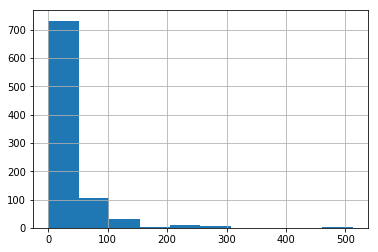

In [18]:
train_data['Fare'].hist()

In [19]:
training_data['Fare_Cat'] = pd.cut(training_data['Fare'], bins=[7., 16.2, 32, 514.0], labels=[3,2,1])

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


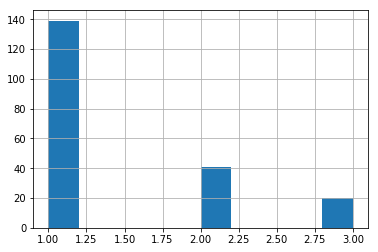

In [20]:
training_data['Fare_Cat'].hist()

In [21]:
training_data['Pclass'].value_counts()

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [22]:
training_data['Fare_Cat'].value_counts()

1    139
2     41
3     20
Name: Fare_Cat, dtype: int64

In [23]:
training_data.Fare.isnull().sum()

0

In [24]:
training_data[training_data['Fare']<=16.2].count()

Survived    24
Pclass      24
Sex         24
Age         21
SibSp       24
Parch       24
Fare        24
Cabin       24
Embarked    24
Fare_Cat    20
dtype: int64

In [25]:
training_data[training_data['Fare'].between(17, 32)].count()

Survived    39
Pclass      39
Sex         39
Age         33
SibSp       39
Parch       39
Fare        39
Cabin       39
Embarked    39
Fare_Cat    39
dtype: int64

In [26]:
training_data[training_data['Fare'].between(32.1, 514)].count()

Survived    139
Pclass      139
Sex         139
Age         129
SibSp       139
Parch       139
Fare        139
Cabin       139
Embarked    137
Fare_Cat    139
dtype: int64

In [27]:
# Find missing values in the Fare_Cat column and which class is most frequent.

missing_fare = training_data[training_data['Fare_Cat'].isnull()]

missing_fare['Pclass'].value_counts()

1    4
Name: Pclass, dtype: int64

In [28]:
# Average price for class 3. Majority of missing values is class 3. 

class_3 = training_data[training_data['Pclass']==3]
class_3['Fare'].mean()

11.698608333333333

In [29]:
training_data['Fare_Cat'].fillna(value=3)
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_Cat
1,1,1,female,38.0,1,0,71.2833,C85,C,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
6,0,1,male,54.0,0,0,51.8625,E46,S,1
10,1,3,female,4.0,1,1,16.7000,G6,S,2
11,1,1,female,58.0,0,0,26.5500,C103,S,2


In [30]:
values = {'Fare_Cat': 3}

training_data = training_data.fillna(value=values)
training_data['Fare_Cat'].isnull().any()

False

In [33]:
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_Cat
1,1,1,female,38.0,1,0,71.2833,C85,C,1
3,1,1,female,35.0,1,0,53.1000,C123,S,1
6,0,1,male,54.0,0,0,51.8625,E46,S,1
10,1,3,female,4.0,1,1,16.7000,G6,S,2
11,1,1,female,58.0,0,0,26.5500,C103,S,2


In [32]:
# Stratafied shuffling 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(training_data, training_data['Fare_Cat']):
    strat_train_set = training_data.loc[train_index]
    strat_test_set = training_data.loc[test_index]


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Fare_Cat", axis=1, inplace=True)

In [37]:
strat_train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
820,1,1,female,52.0,1,1,93.5000,B69,S
519,0,3,male,32.0,0,0,7.8958,NaN,S
173,0,3,male,21.0,0,0,7.9250,NaN,S
632,1,1,male,32.0,0,0,30.5000,B50,C
406,0,3,male,51.0,0,0,7.7500,NaN,S


In [42]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(712, 9)
(179, 9)


In [48]:
X_strat_train = strat_train_set.drop(['Cabin'], axis=1)
y_strat_train = strat_train_set[['Cabin']]
X_strat_test = strat_test_set.drop(['Cabin'], axis=1)
y_strat_test = strat_test_set[['Cabin']]

In [49]:
print(X_strat_train.shape)
print(y_strat_train.shape)
print(X_strat_test.shape)
print(y_strat_test.shape)

(712, 8)
(712, 1)
(179, 8)
(179, 1)


## <u>Part II</u>

# <u>Prepare data for classification models </u>

There are two sets of data. One has been stratified and the other not stratified. The purpose of this section to predict/label the Cabins correctly. I'll build some pipelines to preprocess the data. 

In [53]:
X_cabin_train.drop(['Fare_Cat'], axis=1)
X_cabin_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         140
SibSp         0
Parch         0
Fare          0
Embarked      2
Fare_Cat      0
dtype: int64

In [52]:
X_strat_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         141
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [55]:
X_cabin_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    int64   
 1   Pclass    712 non-null    int64   
 2   Sex       712 non-null    object  
 3   Age       572 non-null    float64 
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Fare      712 non-null    float64 
 7   Embarked  710 non-null    object  
 8   Fare_Cat  712 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 45.3+ KB


In [68]:
# Build pipeline to fill missing values for Age and encode Sex and Embarked. 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

age_pipeline = Pipeline([

    ("age_fill", SimpleImputer(strategy='mean'))
])

embark_pipeline = Pipeline([
    ("embark_col", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())
])

In [57]:
age_df = X_cabin_train[['Age']]

age_tr = age_pipeline.fit_transform(age_df)

In [59]:
age_filled_df = pd.DataFrame(age_tr, columns=age_df.columns, index=age_df.index)
age_filled_df.isnull().any()

Age    False
dtype: bool

In [69]:

preprocess_pipeline = ColumnTransformer([

    ("age_col", SimpleImputer(strategy='mean'), ['Age']),
    ("embarked_col", embark_pipeline, ['Embarked']),
    ("encode_sex", OneHotEncoder(), ['Sex'])
])

X_cabin_train_prepared = preprocess_pipeline.fit_transform(X_cabin_train)

In [70]:
# y data 

y_cabin_train.isnull().sum()

Cabin    553
dtype: int64

In [72]:
y_cabin_train.shape

(712, 1)